# Evaluated project 4

# Predicting the Primary Fuel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# number of rows and column
df.shape

(907, 27)

In [5]:
# This dataset has 907 rows and 27 columns

In [6]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
# We have float,and object data in dataset.

In [8]:
#statistical measures
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [9]:
# check unique values

In [10]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [11]:
df["geolocation_source"].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [12]:
df["geolocation_source"].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [13]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [14]:
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [15]:
#Null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

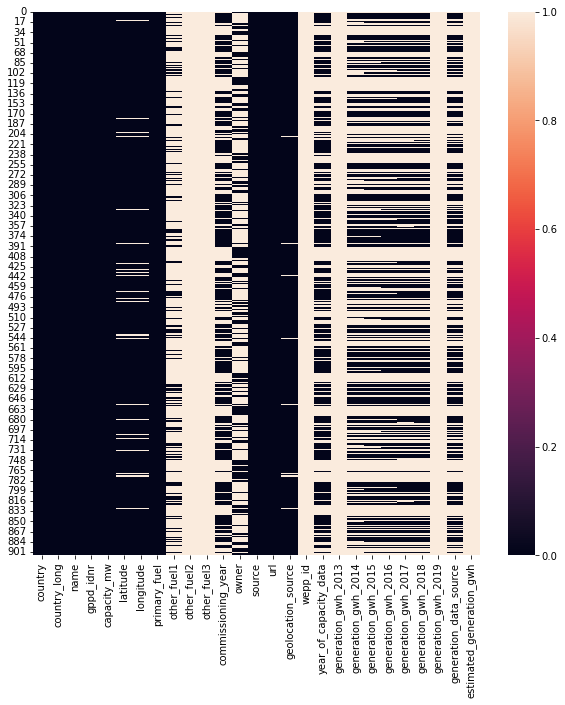

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [17]:
df.shape

(907, 27)

In [18]:
# we can see that estimated_generation_gwh,generation_gwh_2019,wepp_id,other_fuel3,and other_fuel2 has all values with null only so dropping it

In [19]:
df.drop(["estimated_generation_gwh","generation_gwh_2019","generation_gwh_2013","wepp_id","other_fuel3","other_fuel2"],inplace=True,axis=1)

In [20]:
# Null value treatment

In [21]:
from sklearn.impute import SimpleImputer
numerical=["latitude","longitude","commissioning_year","year_of_capacity_data","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]
categorical=["other_fuel1","owner","geolocation_source","generation_data_source"]

In [22]:
s1 = SimpleImputer(strategy = "mean")
s2 = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = s1.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = s2.fit_transform(df[cat].values.reshape(-1,1))

In [23]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# Univariate analysis

<AxesSubplot:xlabel='country', ylabel='count'>

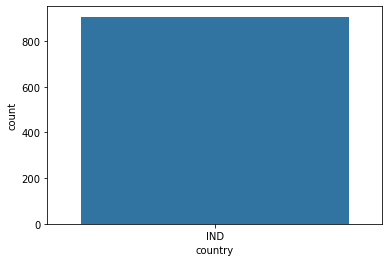

In [24]:
sns.countplot(df['country'])

In [25]:
#Country has only India

<AxesSubplot:xlabel='country_long', ylabel='count'>

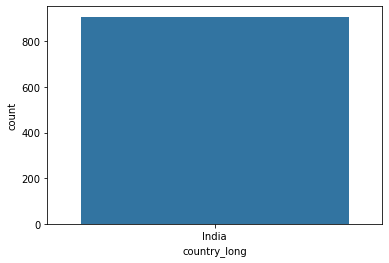

In [26]:
sns.countplot(df['country_long'])

In [27]:
#Country_long also has only india. we should drop one of them both reprsent only india

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

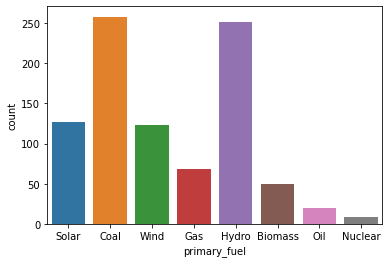

In [28]:
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

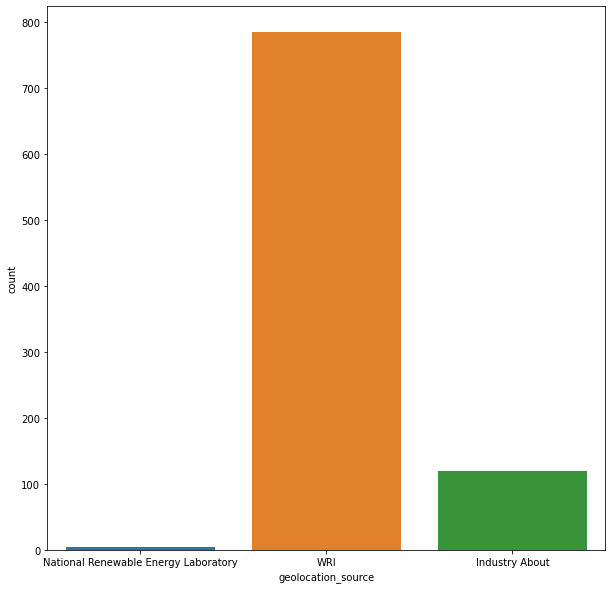

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(df['geolocation_source'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

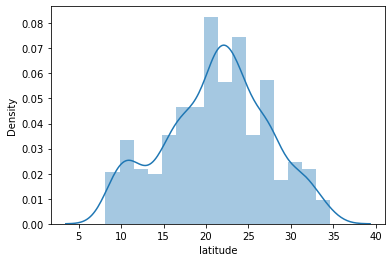

In [30]:
sns.distplot(df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

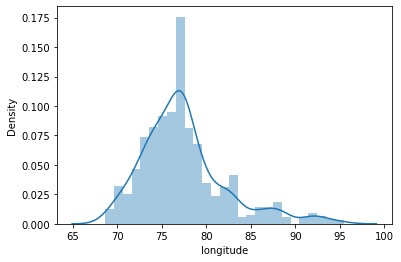

In [31]:
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

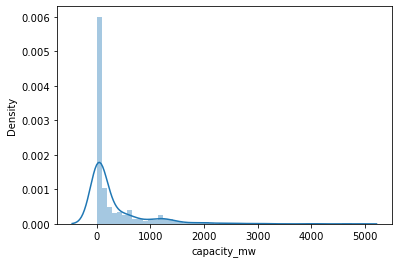

In [32]:
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

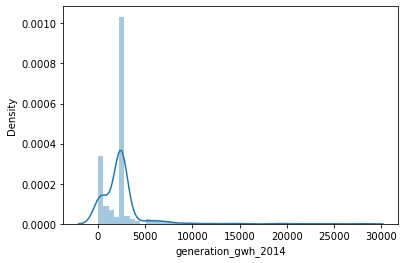

In [33]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

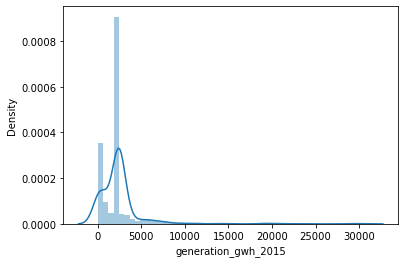

In [34]:
sns.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

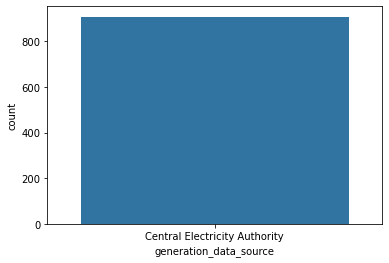

In [35]:
sns.countplot(df['generation_data_source'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

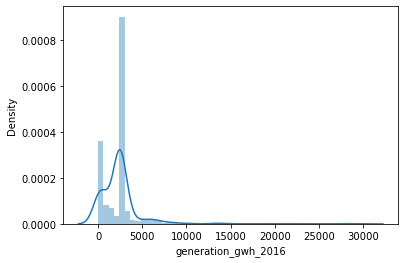

In [36]:
sns.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

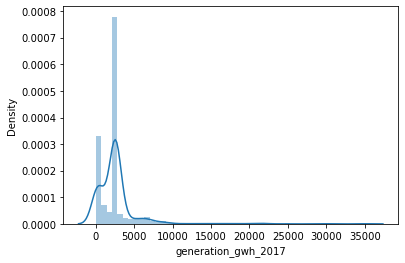

In [37]:
sns.distplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

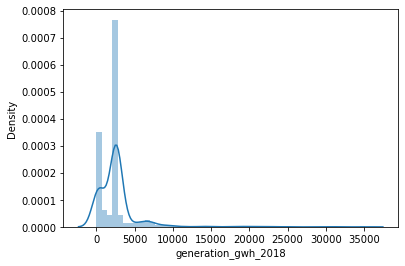

In [38]:
sns.distplot(df['generation_gwh_2018'])

<AxesSubplot:>

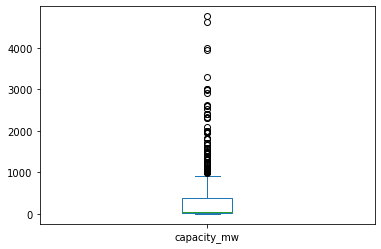

In [39]:
df['capacity_mw'].plot.box()

In [40]:
sk= ['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

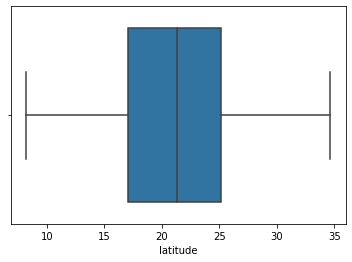

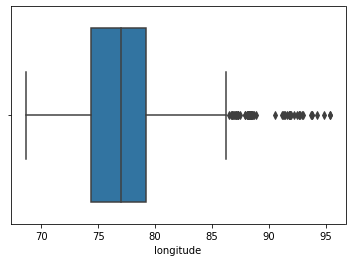

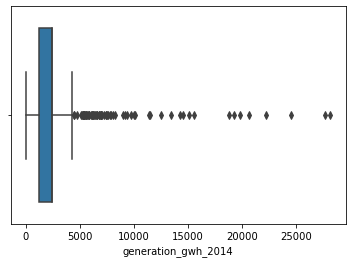

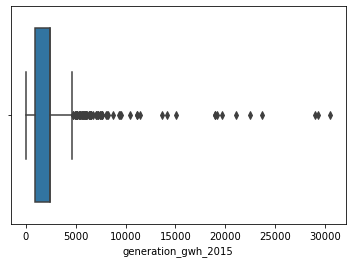

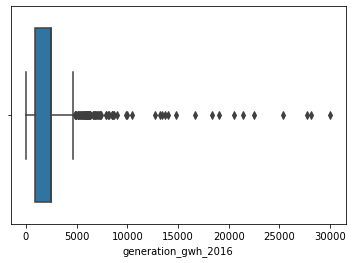

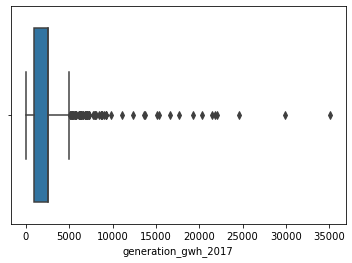

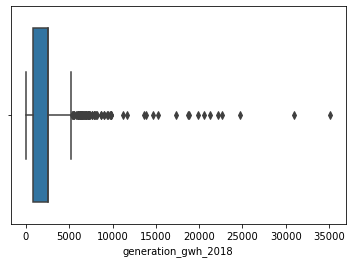

In [41]:
for i in sk:
    sns.boxplot(df[i])
    plt.show()

In [42]:
#longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 might have outliers

# Bivariate Analysis

In [43]:
gb1=df.groupby('primary_fuel')['geolocation_source'].value_counts()
gb1

primary_fuel  geolocation_source                  
Biomass       WRI                                      50
Coal          WRI                                     258
Gas           WRI                                      69
Hydro         WRI                                     251
Nuclear       WRI                                       9
Oil           WRI                                      20
Solar         Industry About                          119
              National Renewable Energy Laboratory      4
              WRI                                       4
Wind          WRI                                     123
Name: geolocation_source, dtype: int64

In [44]:
#most of primary fuel has WRI has Geolocation Source

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

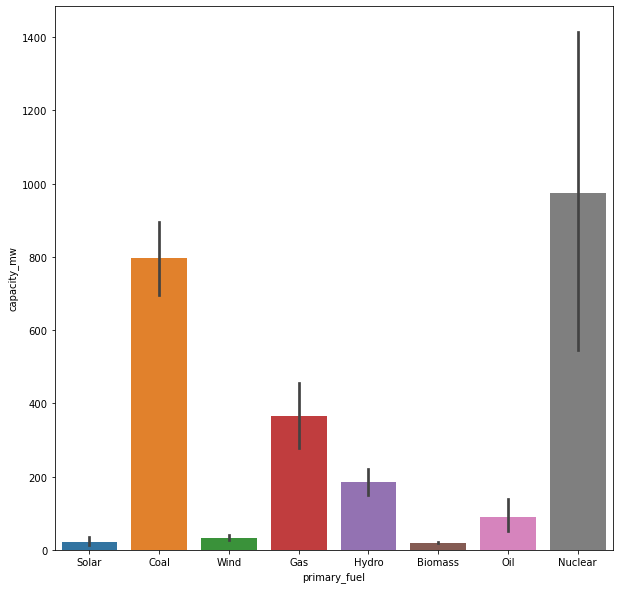

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(df['primary_fuel'],df['capacity_mw'])

In [46]:
#Nuclear and Coal has higher capacity mw

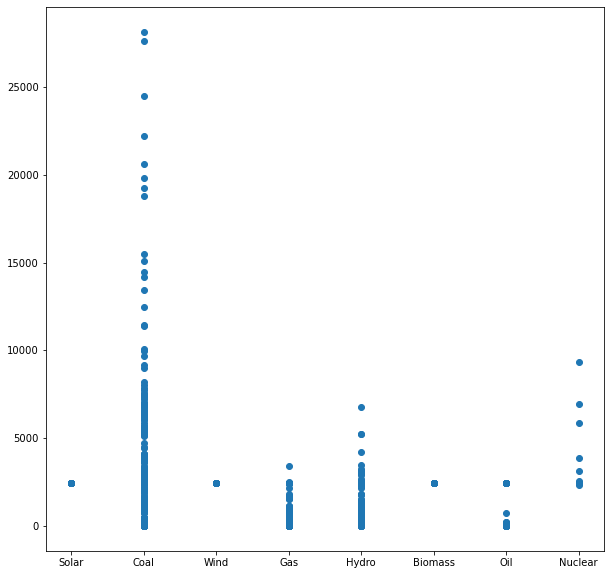

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2014'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

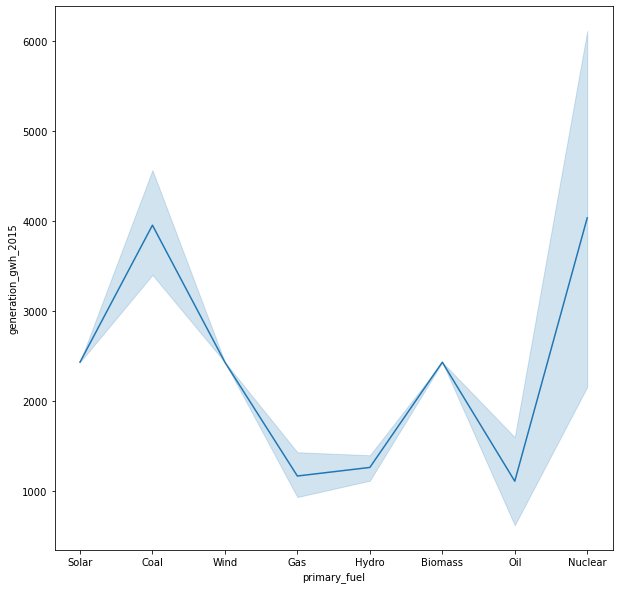

In [48]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2015'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

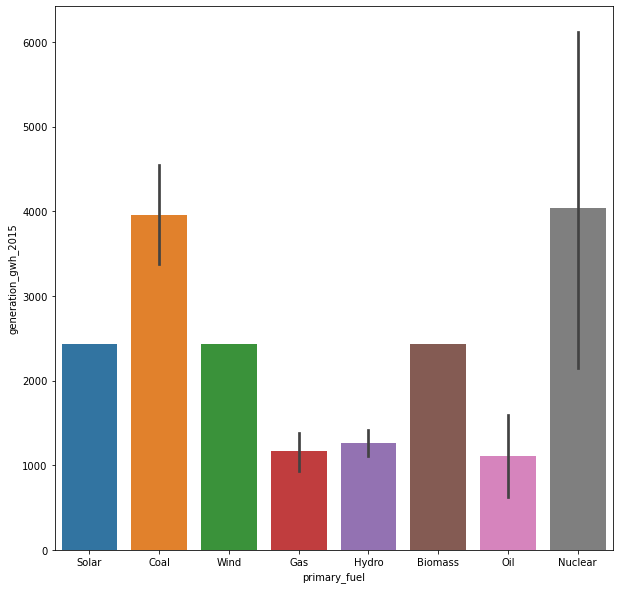

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(df['primary_fuel'],df['generation_gwh_2015'])

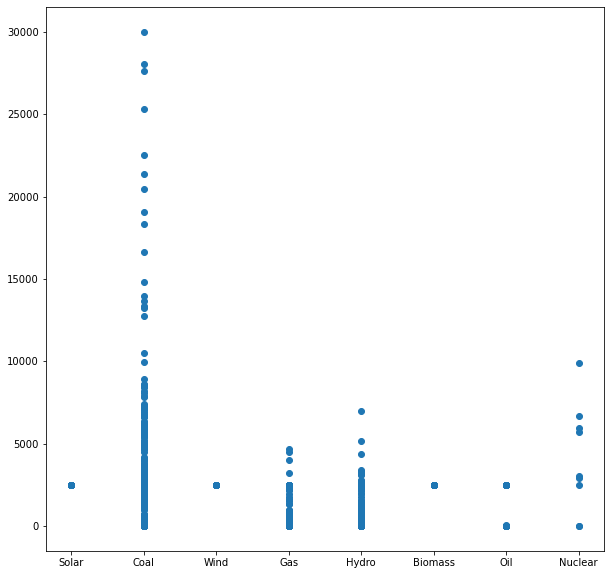

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2016'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

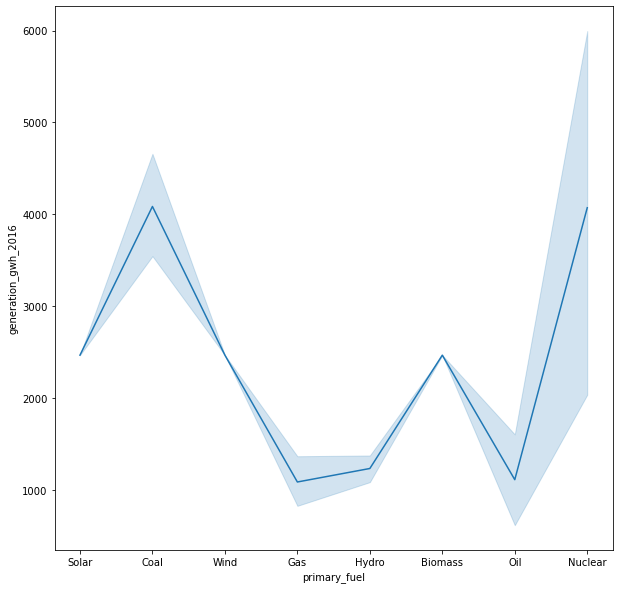

In [51]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2016'])

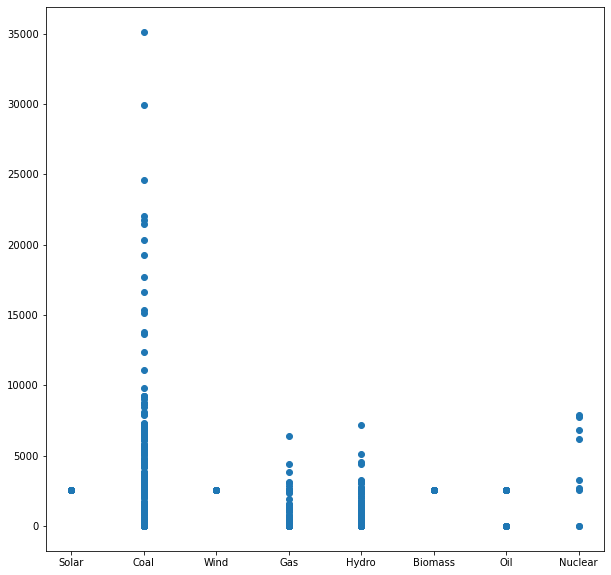

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2017'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

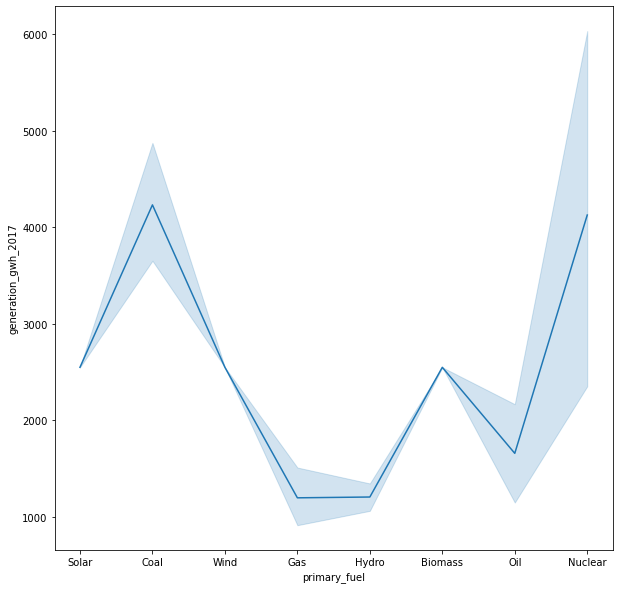

In [53]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2017'])

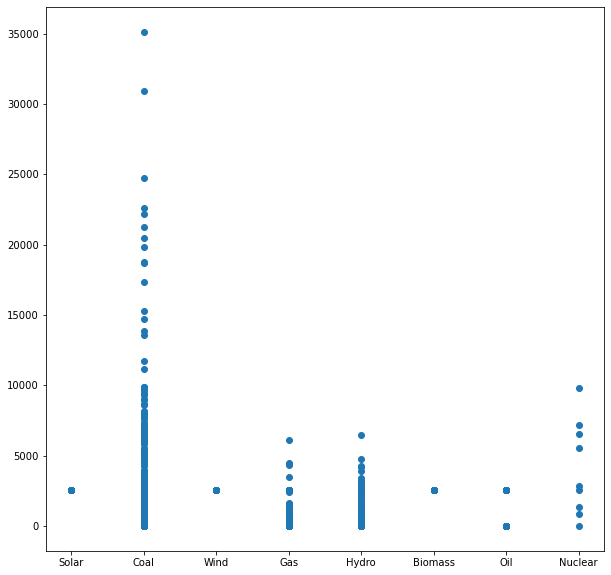

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2018'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

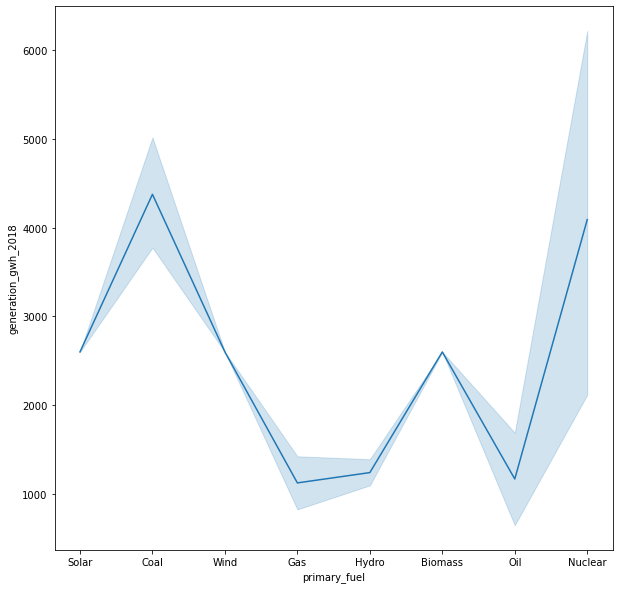

In [55]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2018'])

In [56]:
# Overall coal top's higher gwh generation in all these years

In [57]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

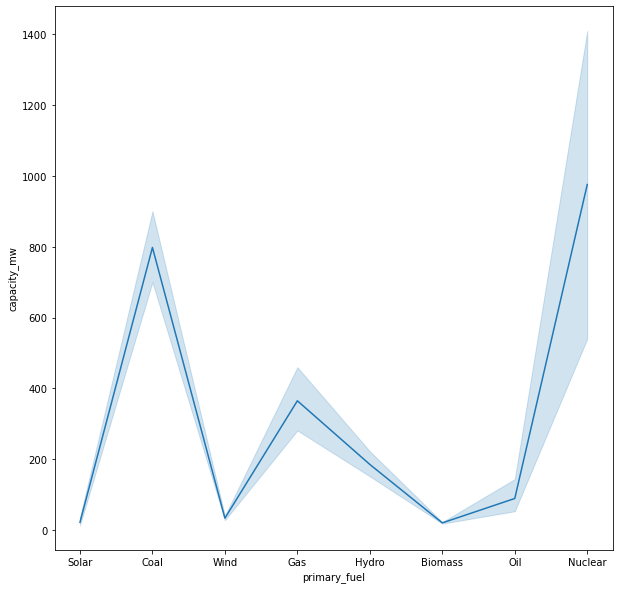

In [58]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['capacity_mw'])

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

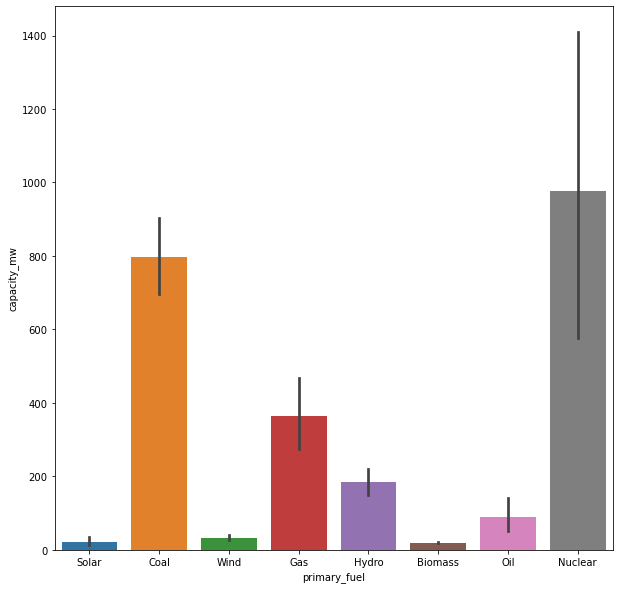

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(df['primary_fuel'],df['capacity_mw'])

In [60]:
# Nuclear and Coal has higest capacity mw

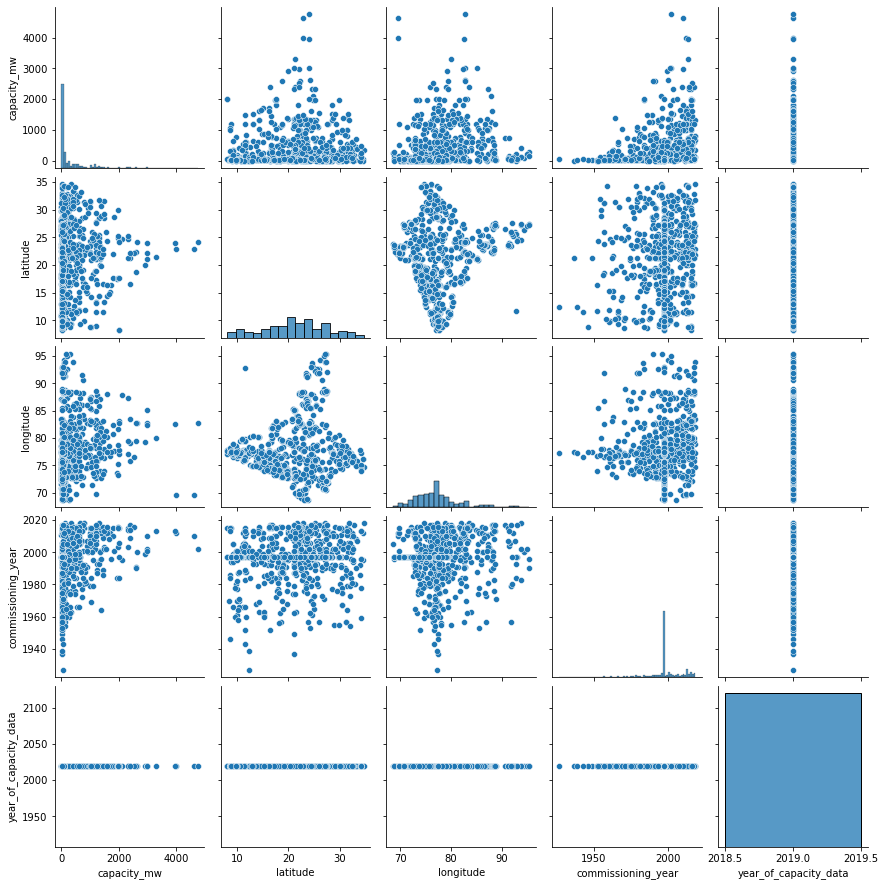

In [61]:
sns.pairplot(df.iloc[:,0:15])

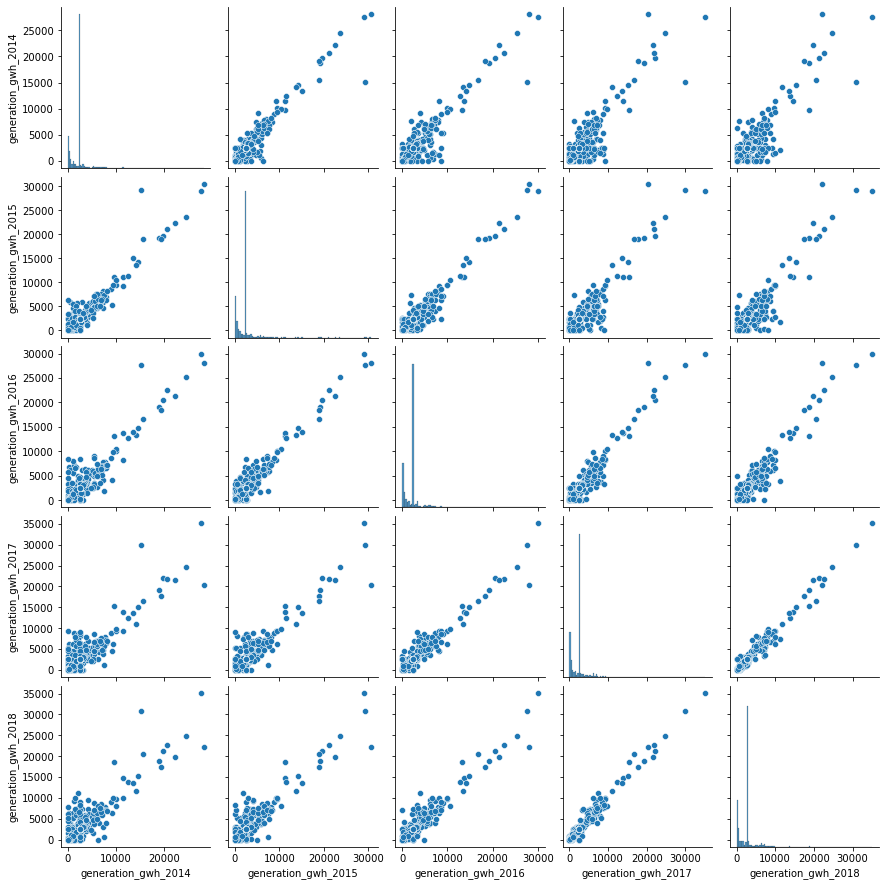

In [62]:
sns.pairplot(df.iloc[:,15:30])

In [63]:
# generation_gwh_2014 is positively correlated with generation_gwh_2018,generation_gwh_2017,generation_gwh_2016 and generation_gwh_2015

# generation_gwh_2015 is positively correlated with generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2014

# generation_gwh_2016 is positively correlated with generation_gwh_2018,generation_gwh_2017,generation_gwh_2015,generation_gwh_2014

# generation_gwh_2017 is positively correlated with generation_gwh_2018,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014

# Encoding

In [64]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [65]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [66]:
df.drop(["country_long"],inplace=True,axis=1)

In [67]:
ordinal = ["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source"]

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [69]:
le = LabelEncoder()
oe = OrdinalEncoder()

for ordi in ordinal:
    df[ordi] = oe.fit_transform(df[ordi].values.reshape(-1,1))
    
df["primary_fuel"] = le.fit_transform(df["primary_fuel"].values.reshape(-1,1))

In [70]:
df.dtypes

country                   float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

In [71]:
# we have succesfully converted all object data to numeric data

# Correlation

<AxesSubplot:>

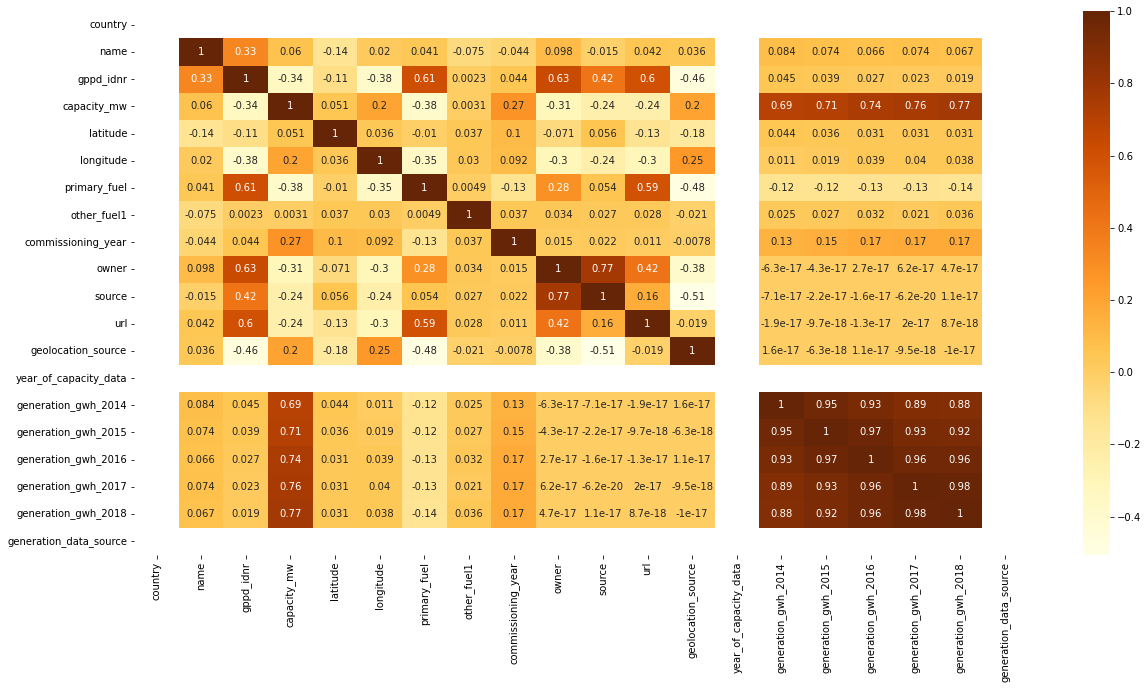

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [73]:
df.corr()["primary_fuel"].sort_values(ascending=False)

primary_fuel              1.000000
gppd_idnr                 0.609180
url                       0.589886
owner                     0.284296
source                    0.053613
name                      0.040753
other_fuel1               0.004912
latitude                 -0.010204
generation_gwh_2014      -0.124769
generation_gwh_2015      -0.124828
commissioning_year       -0.126650
generation_gwh_2016      -0.131051
generation_gwh_2017      -0.132003
generation_gwh_2018      -0.136983
longitude                -0.347948
capacity_mw              -0.380395
geolocation_source       -0.483217
country                        NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

<AxesSubplot:xlabel='primary_fuel', ylabel='gppd_idnr'>

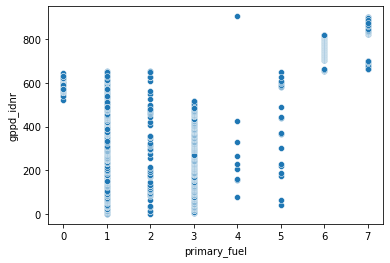

In [74]:
sns.scatterplot(df['primary_fuel'],df['gppd_idnr'])

<AxesSubplot:xlabel='primary_fuel', ylabel='other_fuel1'>

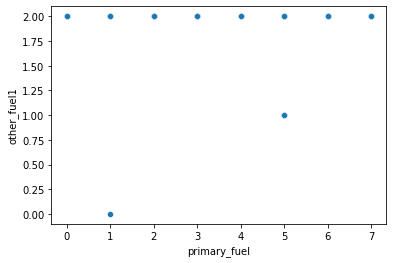

In [75]:
sns.scatterplot(df['primary_fuel'],df['other_fuel1'])

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

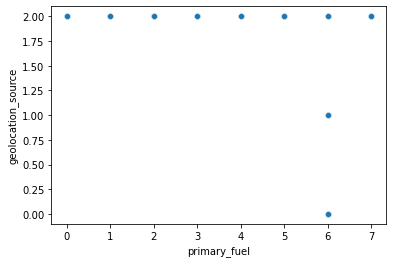

In [76]:
sns.scatterplot(df['primary_fuel'],df['geolocation_source'])

# Skewness

In [77]:
df1 = df.drop(["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source","primary_fuel"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

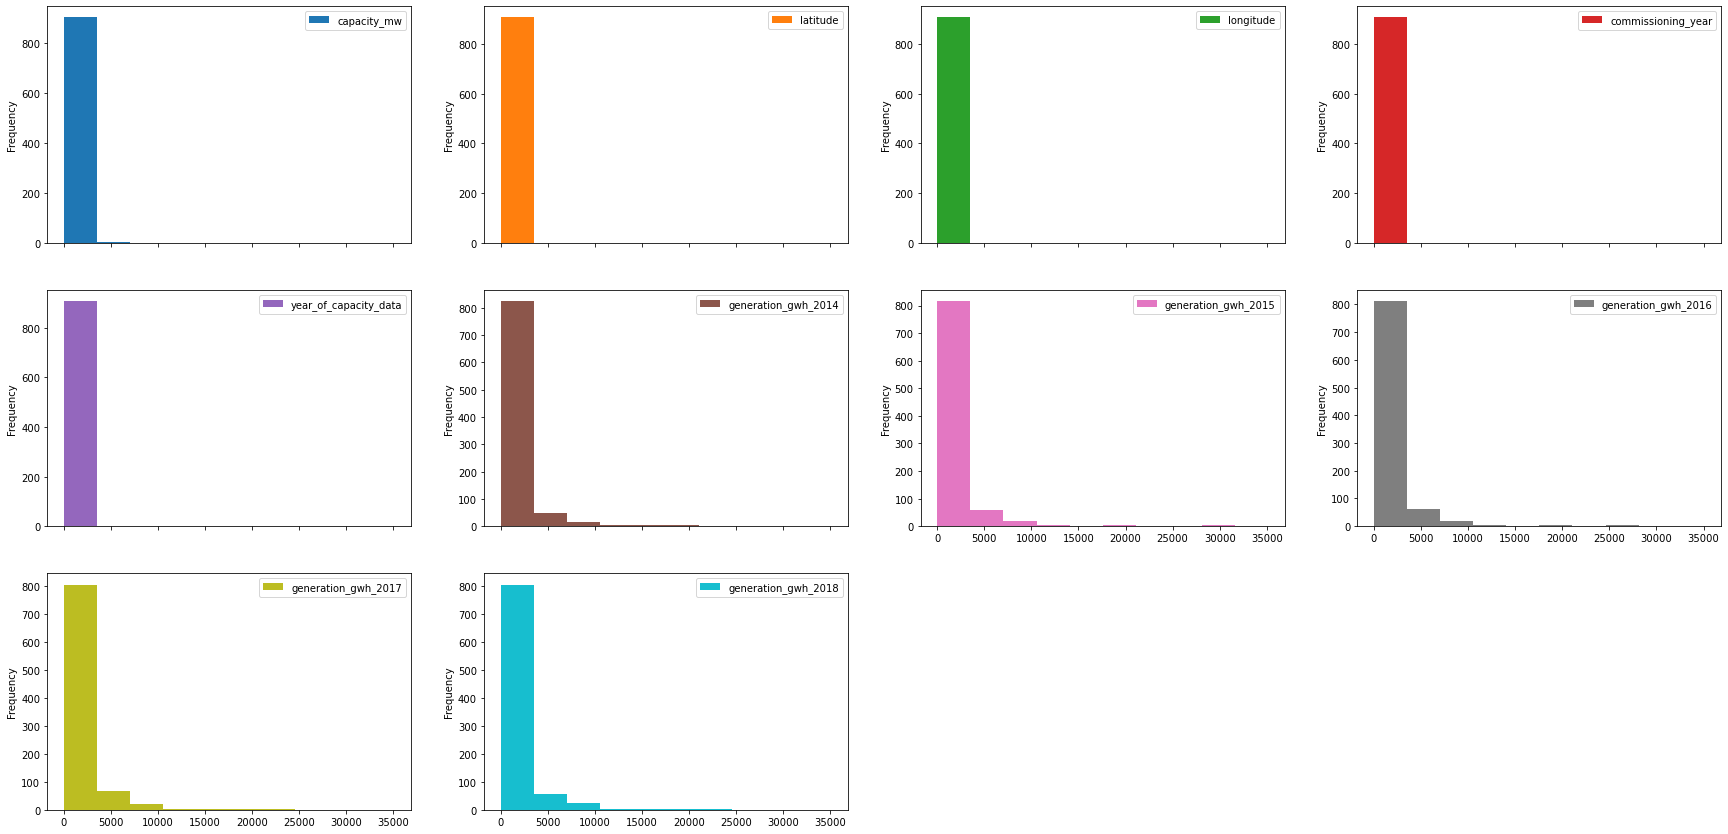

In [78]:
df1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [79]:
df1.skew().sort_values(ascending=False)

generation_gwh_2015      5.364134
generation_gwh_2017      5.110952
generation_gwh_2016      5.068427
generation_gwh_2014      5.035446
generation_gwh_2018      4.937907
capacity_mw              3.123576
longitude                1.141881
year_of_capacity_data    0.000000
latitude                -0.149698
commissioning_year      -1.399359
dtype: float64

# Using power_transform for skewness removal

In [80]:
from sklearn.preprocessing import power_transform
df2 = power_transform(df1)

In [81]:
df2 = pd.DataFrame(df2,columns=df1.columns)
df2.skew()

capacity_mw              0.022164
latitude                -0.074269
longitude                0.002926
commissioning_year      -0.080999
year_of_capacity_data    0.000000
generation_gwh_2014      0.123226
generation_gwh_2015      0.074582
generation_gwh_2016      0.041821
generation_gwh_2017      0.018337
generation_gwh_2018      0.000783
dtype: float64

In [82]:
# we have removed skewness

# outlier removal

capacity_mw                 AxesSubplot(0.125,0.125;0.065678x0.755)
latitude                 AxesSubplot(0.203814,0.125;0.065678x0.755)
longitude                AxesSubplot(0.282627,0.125;0.065678x0.755)
commissioning_year       AxesSubplot(0.361441,0.125;0.065678x0.755)
year_of_capacity_data    AxesSubplot(0.440254,0.125;0.065678x0.755)
generation_gwh_2014      AxesSubplot(0.519068,0.125;0.065678x0.755)
generation_gwh_2015      AxesSubplot(0.597881,0.125;0.065678x0.755)
generation_gwh_2016      AxesSubplot(0.676695,0.125;0.065678x0.755)
generation_gwh_2017      AxesSubplot(0.755508,0.125;0.065678x0.755)
generation_gwh_2018      AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

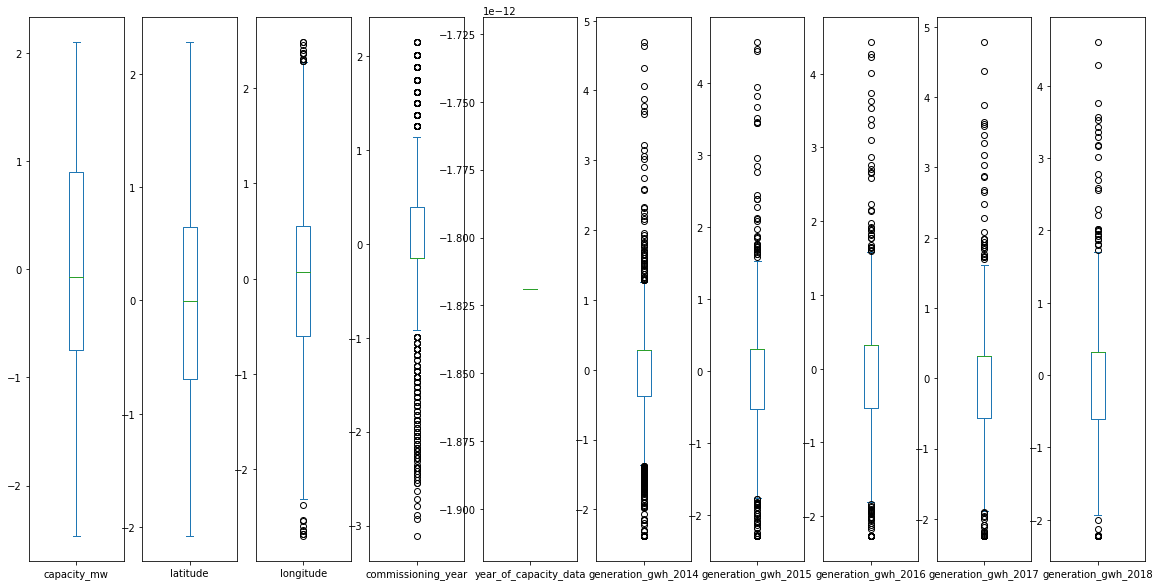

In [83]:
df2.plot(kind="box",subplots=True,figsize=(20,10))

In [84]:
df2.shape

(907, 10)

In [85]:
from scipy.stats import zscore
z = np.abs(zscore(df2))
np.where(z>3)

(array([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880], dtype=int64),
 array([9, 5, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9,
        5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 5, 6, 7, 8, 9, 3, 5, 6, 7, 8, 9,
        5, 6, 7, 8, 9, 5, 6, 7, 8, 9], dtype=int64))

In [86]:
df3 = df2.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],axis=0)
df3.shape

(893, 10)

In [87]:
# The outliers are removed

In [88]:
# data loss
((907-893)/907)*100

1.5435501653803747

# Creating categorical data dataframe

In [89]:
dfc = pd.DataFrame()
dfc["name"] = df["name"]
dfc["country"] = df["country"]
dfc["gppd_idnr"] = df["gppd_idnr"]
dfc["other_fuel1"] =df["other_fuel1"]
dfc["owner"] = df["owner"]
dfc["source"] = df["source"]
dfc["url"] = df["url"]
dfc["geolocation_source"] = df["geolocation_source"]
dfc["generation_data_source"] = df["generation_data_source"]
dfc["primary_fuel"] = df["primary_fuel"]
dfc.shape

(907, 10)

# Removing the outlier removed rows in categorical dataframe

In [90]:
dfc.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],axis=0,inplace=True)
dfc.shape

(893, 10)

# Balancing the data

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

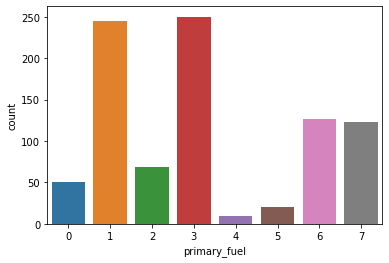

In [91]:
sns.countplot(dfc.iloc[:,-1])

In [92]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [93]:
dfb = df3.join(dfc)
dx = dfb.drop("primary_fuel",axis=1)
dy = dfc.iloc[:,-1]

In [94]:
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

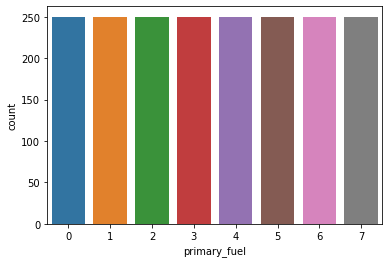

In [95]:
sns.countplot(y)

# Multicolinearity Checking

In [96]:
#variance inflation factor

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(19)]
vif["feature names"] = dft.columns

In [99]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
4,502.065514,year_of_capacity_data
7,13.031704,generation_gwh_2016
9,11.103956,generation_gwh_2018
6,9.366435,generation_gwh_2015
8,6.156887,generation_gwh_2017
14,4.685490,owner
12,4.671104,gppd_idnr
5,4.539839,generation_gwh_2014
15,3.582270,source
0,2.713783,capacity_mw


In [100]:
dft.drop("other_fuel1",axis=1,inplace=True)

In [101]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(18)]
vif["feature names"] = dft.columns

In [102]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
4,30.292560,year_of_capacity_data
7,13.030703,generation_gwh_2016
9,11.026975,generation_gwh_2018
6,9.330439,generation_gwh_2015
8,6.057180,generation_gwh_2017
5,4.537294,generation_gwh_2014
13,4.170927,owner
12,3.300188,gppd_idnr
14,2.891874,source
0,2.697212,capacity_mw


In [103]:
dft.drop("gppd_idnr",axis=1,inplace=True)

In [104]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(17)]
vif["feature names"] = dft.columns

In [105]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
4,20.390655,year_of_capacity_data
7,13.030623,generation_gwh_2016
9,10.991819,generation_gwh_2018
6,9.285041,generation_gwh_2015
8,6.024113,generation_gwh_2017
5,4.518089,generation_gwh_2014
12,4.163381,owner
13,2.770804,source
0,2.128480,capacity_mw
15,1.646091,geolocation_source


In [106]:
dft.drop("generation_gwh_2016",axis=1,inplace=True)

In [107]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(16)]
vif["feature names"] = dft.columns

In [108]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
4,20.380665,year_of_capacity_data
8,9.616456,generation_gwh_2018
6,7.154083,generation_gwh_2015
7,4.915135,generation_gwh_2017
5,4.513122,generation_gwh_2014
11,4.162482,owner
12,2.770718,source
0,2.119336,capacity_mw
14,1.646007,geolocation_source
13,1.427607,url


# Standard Scaler

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
sc = StandardScaler()
x = sc.fit_transform(dft)
x_final= pd.DataFrame(x,columns=dft.columns)

In [111]:
x_final.shape

(2000, 16)

# model Training starts

In [112]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [114]:
#i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [115]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
fl = [dtc,knc,rfc,abc]

oo=0


for i in algo:
    acc=0
    rand=0
    
    for ii in range(0,100):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False) 

 the best random state is 94 and accuracy score is 0.915 for algorithm DecisionTreeClassifier()
 the best random state is 65 and accuracy score is 0.91 for algorithm KNeighborsClassifier()
 the best random state is 65 and accuracy score is 0.9525 for algorithm RandomForestClassifier()
 the best random state is 54 and accuracy score is 0.43 for algorithm AdaBoostClassifier()


In [116]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.94,0.9045
0,DecisionTreeClassifier(),0.93,0.8560
1,KNeighborsClassifier(),0.91,0.8425
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.43,0.3695


In [117]:
final_result.loc[2]["Algorithm Name"]

RandomForestClassifier()

In [118]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.9, the cross validation score is 0.86 for SVC


# HyperParameter Tunining

In [119]:
#from sklearn.model_selection import GridSearchCV

In [120]:
#rf = RandomForestClassifier()
#parameters = {'bootstrap': [True, False],
 #'max_depth': [10, 20, 90, None],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 #'n_estimators': [200, 400, 600]}
#train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=47)
#gsv = GridSearchCV(rf,parameters)
#gsv.fit(train_x,train_y)

In [121]:
#gsv.best_params_

In [122]:
# using the best parameters got in grid search

In [123]:
rf = RandomForestClassifier(bootstrap=False,max_depth=20,max_features='auto',min_samples_leaf=1,n_estimators=600,min_samples_split=2)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=47)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.9325, the cross validation score is 0.9105000000000001 


In [124]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        47
           1       0.91      0.74      0.81        53
           2       0.86      0.84      0.85        50
           3       0.92      0.91      0.91        53
           4       0.95      1.00      0.97        53
           5       0.91      1.00      0.95        52
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        46

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.93      0.93       400



In [125]:
print(confusion_matrix(test_y,pred))

[[47  0  0  0  0  0  0  0]
 [ 4 39  3  3  3  1  0  0]
 [ 0  3 42  1  0  4  0  0]
 [ 0  1  4 48  0  0  0  0]
 [ 0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0 52  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 46]]


In [126]:
# saving the model

In [127]:
import joblib
joblib.dump(rf,"Global Power Plant primary fuel.pkl")

['Global Power Plant primary fuel.pkl']

# Predicting the capacity mw


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
# Read csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [130]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.shape

(907, 27)

In [132]:
#I am going to use all techniques i used earlier on this dataset but considering capacity_mw as target variable

In [133]:
# Null value check

<AxesSubplot:>

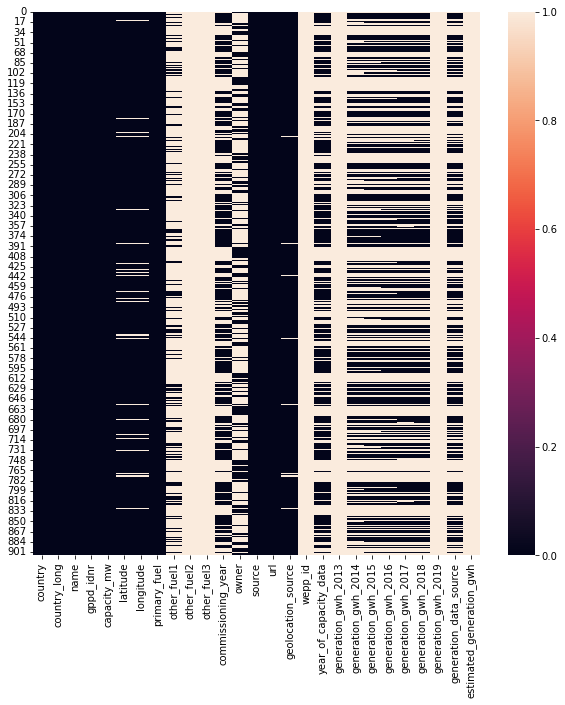

In [134]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [135]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [136]:
df.shape

(907, 27)

In [137]:
# we can see that estimated_generation_gwh,generation_gwh_2019,wepp_id,other_fuel3,and other_fuel2 has all values with null only so dropping it

In [138]:
df.drop(["estimated_generation_gwh","generation_gwh_2019","generation_gwh_2013","wepp_id","other_fuel3","other_fuel2"],inplace=True,axis=1)

In [139]:
# Null value treatment

In [140]:
from sklearn.impute import SimpleImputer
numerical=["latitude","longitude","commissioning_year","year_of_capacity_data","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]
categorical=["other_fuel1","owner","geolocation_source","generation_data_source"]

In [141]:
sii = SimpleImputer(strategy = "mean")
siii = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = sii.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))

In [142]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# Encoding

In [143]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [144]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [145]:
df["country_long"].unique().sum()

'India'

In [146]:
df["country"].unique().sum()

'IND'

In [147]:
# since both country and country long both represent india i will drop one

In [148]:
df.drop(["country_long"],inplace=True,axis=1)

In [149]:
ordinal = ["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source","primary_fuel"]

In [150]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for ordi in ordinal:
    df[ordi] = oe.fit_transform(df[ordi].values.reshape(-1,1))

In [151]:
df.dtypes

country                   float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
other_fuel1               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

In [152]:
#we have successfully converted object data to numeric data

# Skewness Check

In [153]:
dc1 = df.drop(["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source","primary_fuel","capacity_mw"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

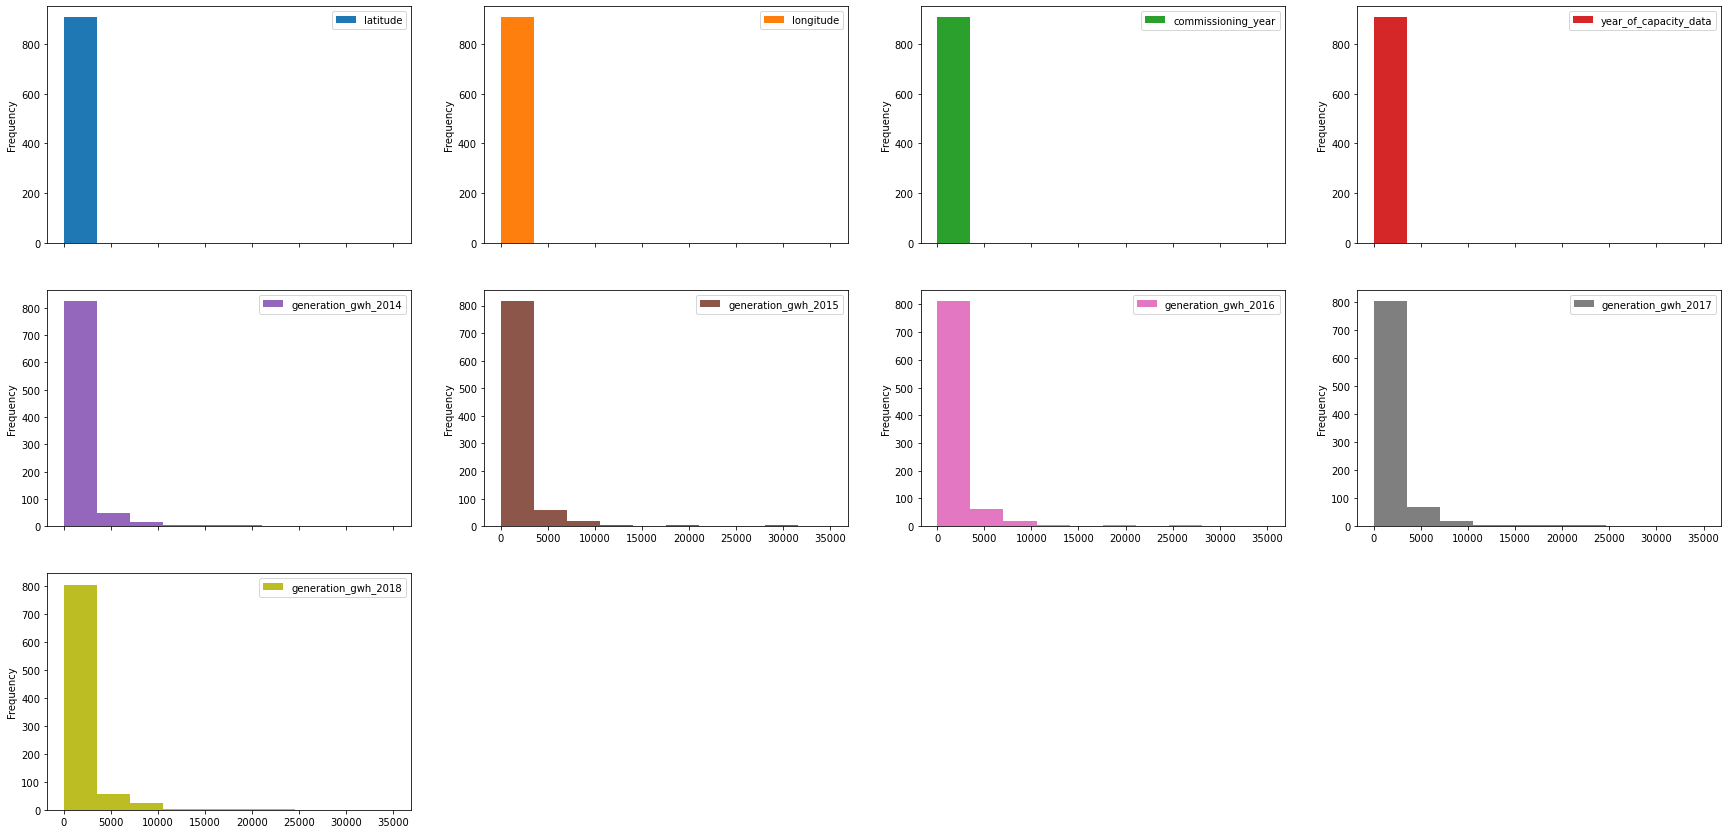

In [154]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [155]:
dc1.skew().sort_values(ascending=False)

generation_gwh_2015      5.364134
generation_gwh_2017      5.110952
generation_gwh_2016      5.068427
generation_gwh_2014      5.035446
generation_gwh_2018      4.937907
longitude                1.141881
year_of_capacity_data    0.000000
latitude                -0.149698
commissioning_year      -1.399359
dtype: float64

In [156]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

dc2.skew()

latitude                -0.074269
longitude                0.002926
commissioning_year      -0.080999
year_of_capacity_data    0.000000
generation_gwh_2014      0.123226
generation_gwh_2015      0.074582
generation_gwh_2016      0.041821
generation_gwh_2017      0.018337
generation_gwh_2018      0.000783
dtype: float64

# Outlier check

In [157]:
from scipy.stats import zscore

latitude                    AxesSubplot(0.125,0.125;0.0731132x0.755)
longitude                AxesSubplot(0.212736,0.125;0.0731132x0.755)
commissioning_year       AxesSubplot(0.300472,0.125;0.0731132x0.755)
year_of_capacity_data    AxesSubplot(0.388208,0.125;0.0731132x0.755)
generation_gwh_2014      AxesSubplot(0.475943,0.125;0.0731132x0.755)
generation_gwh_2015      AxesSubplot(0.563679,0.125;0.0731132x0.755)
generation_gwh_2016      AxesSubplot(0.651415,0.125;0.0731132x0.755)
generation_gwh_2017      AxesSubplot(0.739151,0.125;0.0731132x0.755)
generation_gwh_2018      AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

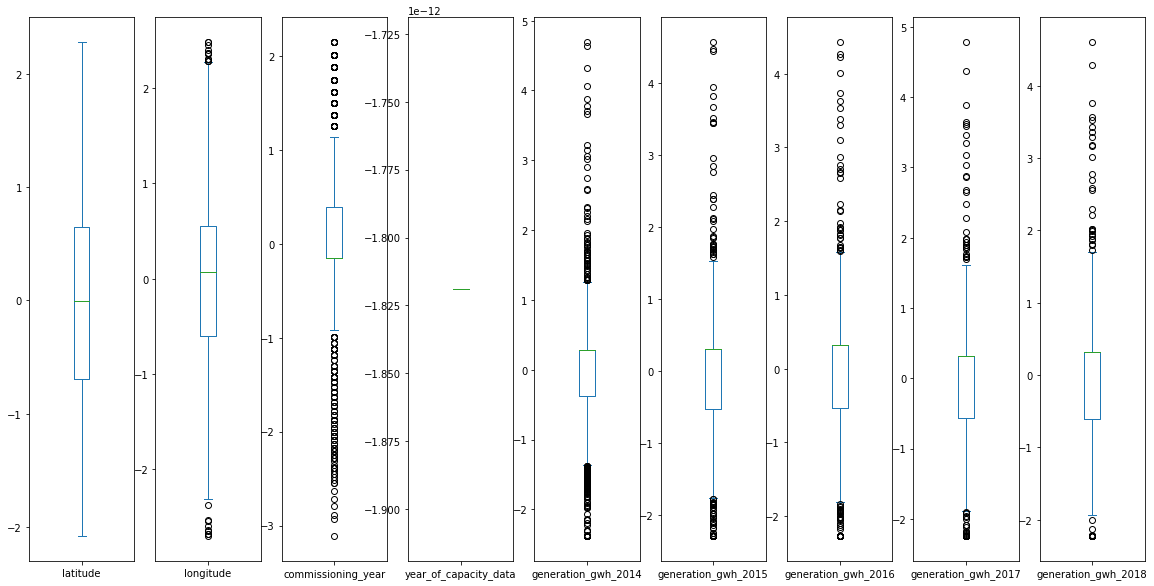

In [158]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [159]:
z = np.abs(zscore(dc2))
np.where(z>3)

(array([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880], dtype=int64),
 array([8, 4, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8,
        4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 4, 5, 6, 7, 8, 2, 4, 5, 6, 7, 8,
        4, 5, 6, 7, 8, 4, 5, 6, 7, 8], dtype=int64))

# outliers found so proceeding for zscore outlier removal

In [160]:
df1 = dc2.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],axis=0)

In [161]:
df1.shape

(893, 9)

In [162]:
dc2.shape

(907, 9)

# Data Loss

In [163]:
((907-893)/907)*100

1.5435501653803747

# Creating Categorical DataFrame with target variable

In [164]:
dfc = pd.DataFrame()
dfc["name"] = df["name"]
dfc["country"] = df["country"]
dfc["gppd_idnr"] = df["gppd_idnr"]
dfc["other_fuel1"] =df["other_fuel1"]
dfc["owner"] = df["owner"]
dfc["source"] = df["source"]
dfc["url"] = df["url"]
dfc["geolocation_source"] = df["geolocation_source"]
dfc["generation_data_source"] = df["generation_data_source"]
dfc["primary_fuel"] = df["primary_fuel"]
dfc["capacity_mw"] = df["capacity_mw"]
dfc.shape

(907, 11)

In [165]:
# removing outliers rows in Dataframe we created earlier

In [166]:
dfc.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],inplace=True,axis=0)
dfc.shape

(893, 11)

# Mulitcolinearity Checking

In [167]:
# variance inflation factor

In [168]:
dft = df1.join(dfc)
dft.drop("capacity_mw",axis=1,inplace=True)
dft.shape

(893, 19)

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(19)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
3,668.938915,year_of_capacity_data
6,10.706142,generation_gwh_2016
8,10.653027,generation_gwh_2018
7,9.993880,generation_gwh_2017
5,7.336660,generation_gwh_2015
4,4.094831,generation_gwh_2014
11,4.071604,gppd_idnr
14,3.832644,source
13,3.737558,owner
18,3.689925,primary_fuel


In [171]:
dft.drop("other_fuel1",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(18)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
3,48.701461,year_of_capacity_data
6,10.701937,generation_gwh_2016
8,10.584072,generation_gwh_2018
7,9.968649,generation_gwh_2017
5,7.335457,generation_gwh_2015
4,4.090113,generation_gwh_2014
11,3.749314,gppd_idnr
12,3.382340,owner
14,2.426400,url
13,2.345948,source


In [172]:
dft.drop("gppd_idnr",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(17)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)


,vif value,feature names
3,44.508166,year_of_capacity_data
6,10.701572,generation_gwh_2016
8,10.582826,generation_gwh_2018
7,9.965836,generation_gwh_2017
5,7.288583,generation_gwh_2015
4,4.063497,generation_gwh_2014
11,3.200400,owner
14,3.003007,geolocation_source
13,2.293521,url
12,2.224931,source


In [173]:
#Multicolinearity Removed
#Standard Scaler

In [174]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(dft)
x_final= pd.DataFrame(x,columns=dft.columns)

In [175]:
x_final.shape

(893, 17)

In [176]:
y = dfc.iloc[:,-1]

# Model Training Starts

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [178]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
licol=[lin,dec,rid,las,kne,rfr,ada]

algo = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,60):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} and best accuracy is { acc} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()
    print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}')    
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)

the best random state is 14 and best accuracy is 0.5309434300225991 for LinearRegression()
the training score is 0.5309434300225991 the testing score is 0.1444821312259882 the cross val score is 0.46886118043746644 for LinearRegression()
the best random state is 0 and best accuracy is 1.0 for DecisionTreeRegressor()
the training score is 1.0 the testing score is 0.6431549590155647 the cross val score is 0.6668555378296502 for DecisionTreeRegressor()
the best random state is 14 and best accuracy is 0.5309398242485521 for Ridge()
the training score is 0.5309398242485521 the testing score is 0.1462626152465053 the cross val score is 0.46924194069943204 for Ridge()
the best random state is 14 and best accuracy is 0.5307924275231866 for Lasso()
the training score is 0.5307924275231866 the testing score is 0.15447563776446194 the cross val score is 0.4718085991147989 for Lasso()
the best random state is 10 and best accuracy is 0.8262743206977454 for KNeighborsRegressor()
the training score i

In [179]:
final_result

,Model Name,Train Score,Test Score,Cross Val Score
5,"(DecisionTreeRegressor(max_features=1.0, rando...",0.977685,0.687933,0.788615
4,KNeighborsRegressor(),0.826274,0.569670,0.689760
1,DecisionTreeRegressor(),1.000000,0.643155,0.666856
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.703611,0.544372,0.610151
3,Lasso(),0.530792,0.154476,0.471809
2,Ridge(),0.530940,0.146263,0.469242
0,LinearRegression(),0.530943,0.144482,0.468861


In [180]:
final_result["Model Name"][5]

RandomForestRegressor()

# Random Foreset RegressorPerformed Best compared to all

In [181]:
# Hyperparameter tuning

In [182]:
#from sklearn.model_selection import GridSearchCV

In [183]:
#rf = RandomForestRegressor()
#parameters = {'bootstrap': [True, False],
 #'max_depth': [10, 20, 90, None],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 #'n_estimators': [200, 400, 600]}
#train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=71)
#gsv = GridSearchCV(rf,parameters)
#gsv.fit(train_x,train_y)

In [184]:
#gsv.best_params_

In [185]:
# Running Random Forest with Best Parameters

In [186]:
rf = RandomForestRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,n_estimators=600,min_samples_split=2)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=19)
rf.fit(train_x,train_y)
trs = rf.score(train_x,train_y)
tss = rf.score(test_x,test_y)
pred = rf.predict(test_x)
cvs = cross_val_score(rf,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 0.9999999998685684 the testing score is 0.8077179307742077 the cross val score is 0.7969946293126133
Mean Squared Error 56892.76752160676
Mean Absolute Error 122.94069503731336
Root Mean Squared Error 238.52204829240998
R2 Score 0.8077179307742077


# after tuning training score gets 100% and testing score 80 % and cross val socre 80%

In [187]:
# Saving the prediciton

In [188]:
answer = pd.DataFrame(pred)
answer.head()

,0
0,20.193500
1,12.587417
2,19.833000
3,8.011583
4,47.754250


# Saving the model

In [189]:
import joblib
joblib.dump(rf,"Global power plant capacity mw.pkl")

['Global power plant capacity mw.pkl']